# Python 实现自回归模型(AR)

## import libarary

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg

## make data 

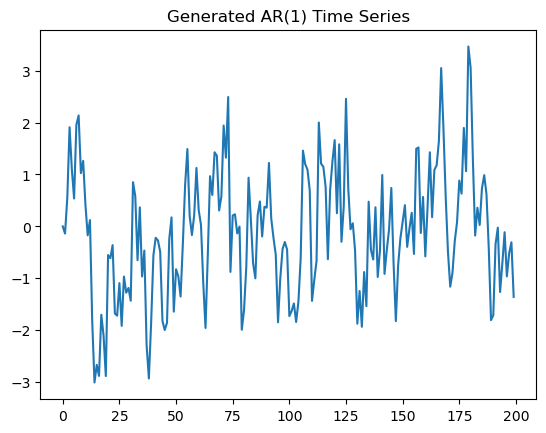

In [3]:
# 设置随机种子以便结果可重复
np.random.seed(42)

# 生成自回归过程数据
n = 200
phi = 0.7  # 自回归系数
error = np.random.normal(0, 1, n)  # 生成噪声项
series = np.zeros(n)

# 构建 AR(1) 模型的时间序列
for t in range(1, n):
    series[t] = phi * series[t-1] + error[t]

# 绘制时间序列
plt.plot(series)
plt.title('Generated AR(1) Time Series')
plt.show()

## 构建并拟合自回归模型

In [4]:
# 构建自回归模型，选择滞后阶数 p=1
model = AutoReg(series, lags=1)

# 拟合模型
model_fit = model.fit()

# 输出模型参数
print('Coefficients:', model_fit.params)

Coefficients: [-0.04988669  0.64749542]


## 模型预测

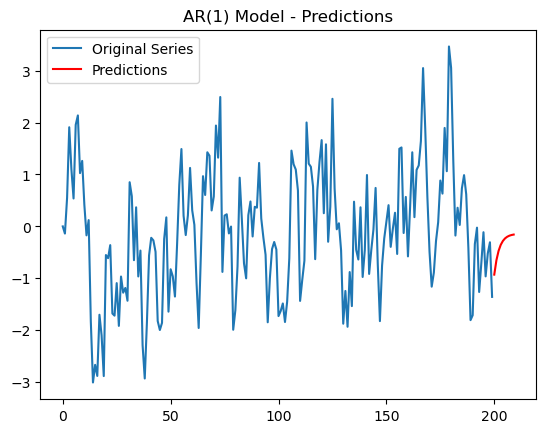

In [6]:
# 预测未来 10 个时间点的值
predictions = model_fit.predict(start=len(series), end=len(series) + 10 - 1, dynamic=False)

# 绘制原始时间序列和预测值
plt.plot(series, label='Original Series')
plt.plot(np.arange(len(series), len(series) + 10), predictions, label='Predictions', color='red')
plt.title('AR(1) Model - Predictions')
plt.legend()
plt.show()

## 自己实现

In [66]:
df = pd.DataFrame(data=series.reshape(-1, 1), columns=['y'])
df.head()

,y
0,0.000000
1,-0.138264
2,0.550904
3,1.908662
4,1.101910


In [67]:
lag_n = 1
for lag_i in range(1, lag_n + 1):
    df[f"lag_{lag_i}"] = df['y'].shift(lag_i)
df.fillna(0.0, inplace=True)
df['const'] = 1.0

In [68]:
df.head()

,y,lag_1,const
0,0.000000,0.000000,1.0
1,-0.138264,0.000000,1.0
2,0.550904,-0.138264,1.0
3,1.908662,0.550904,1.0
4,1.101910,1.908662,1.0


In [69]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

In [71]:
X_train, X_test, y_train, y_test = X[:180], X[180:], y[:180], y[180:]

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
df_y = pd.DataFrame(y)
df_y['y_hat'] = np.concatenate([np.full(y_train.shape, np.nan), y_pred])

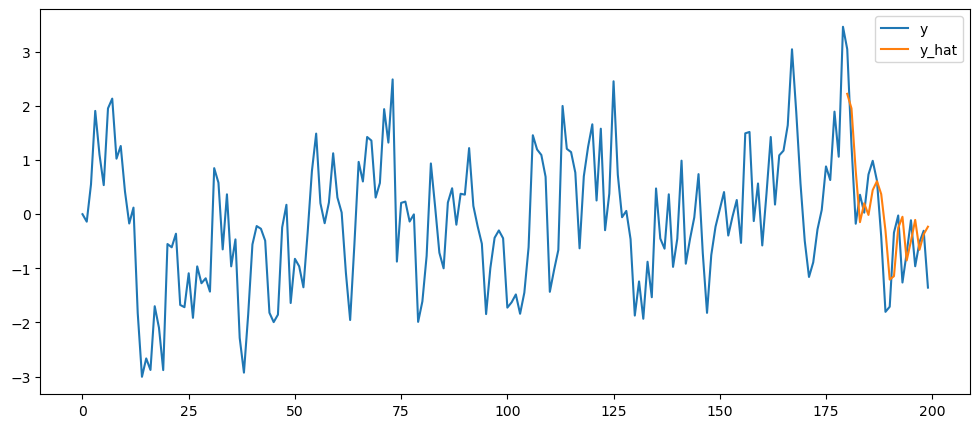

In [74]:
df_y[['y', 'y_hat']].plot(figsize=(12, 5))
plt.show()